## Описание проекта

Вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.
Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль и проанализировать возможную прибыль и риски техникой Bootstrap.

## 1. Изучение и подготовка данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from sklearn import *
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from scipy import stats as st
from scipy.stats import t



Изучим данные по пробам нефти в трех регионах:

In [2]:
try:
    df_0 = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/geo_data_0.csv")
except:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')

df_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [3]:
df_0.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
try:
    df_1 = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/geo_data_1.csv")
except:
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')

df_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [6]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
try:
    df_2 = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/geo_data_2.csv")
except:
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')

df_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [9]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Посмотрим на распределение целевого признака:

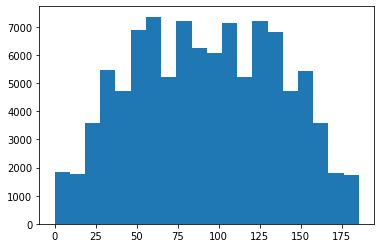

In [11]:
plt.hist(df_0['product'], bins=20)
plt.show();

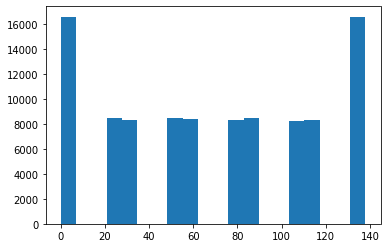

In [12]:
plt.hist(df_1['product'], bins=20)
plt.show();

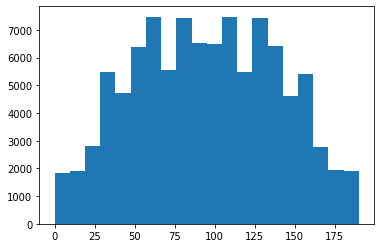

In [13]:
plt.hist(df_2['product'], bins=20)
plt.show();

1 и 3 регионы схожи между собой и распредены более-менее нормально. Регион №2 отличается большим наличием скважин с очень низкими или очень высокими запасами.

Первое знакомство с данными показывает отсутствие каких-либо пропусков или аномалий.

Для построения модели оставим только необходимые признаки. К ним не относится уникальный идентификатор скважины:

In [14]:
df_0 = df_0.drop(['id'], axis=1)
df_1 = df_1.drop(['id'], axis=1)
df_2 = df_2.drop(['id'], axis=1)

## 2. Обучение и проверка модели для каждого региона

### 2.1 Деление на выборки

Разделим исходные данные для каждого региона на обучающую и валидационную выборки в соотношении 3:1:

In [15]:
target_0 = df_0['product']
features_0 = df_0.drop(['product'], axis=1)

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=12345)

In [16]:
target_1 = df_1['product']
features_1 = df_1.drop(['product'], axis=1)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=12345)

In [17]:
target_2 = df_2['product']
features_2 = df_2.drop(['product'], axis=1)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=12345)

### 2.2 Обучение модели и получение предсказаний

In [18]:
model_0 = LinearRegression() 
model_0.fit(features_train_0, target_train_0)
predicted_valid_0 = model_0.predict(features_valid_0)


In [19]:
model_1 = LinearRegression() 
model_1.fit(features_train_1, target_train_1)
predicted_valid_1 = model_1.predict(features_valid_1)


In [20]:
model_2 = LinearRegression() 
model_2.fit(features_train_2, target_train_2)
predicted_valid_2 = model_2.predict(features_valid_2)


### 2.3 Сравним средние запасы предсказанного сырья и RMSE модели.

In [21]:
def rmse(target_valid, predicted_valid):
    mse = mean_squared_error(target_valid, predicted_valid)
    print("Средний запас =", predicted_valid.mean())
    print("RMSE =", mse ** 0.5)

In [22]:
rmse(target_valid_0, predicted_valid_0)

Средний запас = 92.59256778438035
RMSE = 37.5794217150813


In [23]:
rmse(target_valid_1, predicted_valid_1)

Средний запас = 68.728546895446
RMSE = 0.893099286775617


In [24]:
rmse(target_valid_2, predicted_valid_2)

Средний запас = 94.96504596800489
RMSE = 40.02970873393434


Результаты первого и третьего региона схожи между собой. У второго региона средний запас ниже, но RMSE близка к нулю, что говорит о значительно лучшем качестве модели по сравнению с другими двумя.

## 3. Подготовка к расчёту прибыли

In [25]:
# Доход за тысячу баррелей:
Thousand_Barrel_Profit = 450000

In [26]:
# Бюджет на разработку скважин в регионе:
Region_Total_Budget = 10000000000

In [27]:
# Количество скважин в регионе:
Well_Number = 200

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины:

In [28]:
sufficient_supply = Region_Total_Budget/Thousand_Barrel_Profit/Well_Number
sufficient_supply

111.11111111111111

Наконец, рассчитаем достаточный объем выручки с одной скважины:

In [29]:
sufficient_profit = sufficient_supply*Thousand_Barrel_Profit
sufficient_profit

50000000.0

Во всех регионах средний запас скважины ниже необходимого запаса для окупаемости вложений.

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен
  
</div>


## 4. Функция для расчёта прибыли 

Создадим функцию для расчета прибыли по 200 скважинам с наибольшими запасами соглаcно прогнозу модели:

Рассчитаем прибьль для каждого региона:

In [30]:
target_valid_0 = pd.Series(target_valid_0).reset_index(drop=True)
predicted_valid_0 = pd.Series(predicted_valid_0).reset_index(drop=True)

target_valid_1 = pd.Series(target_valid_1).reset_index(drop=True)
predicted_valid_1 = pd.Series(predicted_valid_1).reset_index(drop=True)

target_valid_2 = pd.Series(target_valid_2).reset_index(drop=True)
predicted_valid_2 = pd.Series(predicted_valid_2).reset_index(drop=True)


 
def well_profit(target, probabilities,number):
    probs_200 = probabilities.sort_values(ascending=False)
    target_200 = target[probs_200.index][:number]
    return Thousand_Barrel_Profit * target_200.sum()-Region_Total_Budget

   
     
    
    
    
   

In [42]:
well_profit(predicted_valid_0,target_valid_0,200)


503166796.91059875

In [32]:
well_profit(predicted_valid_1,target_valid_1,200)

2368114191.9582977

In [33]:
well_profit(predicted_valid_2,target_valid_2,200)

-327855567.1414356

Можно сделать вывод о том, что крупнейшие 200 скважин позволят окупить затраты в 1 и 2 регионах.

<div class="alert alert-block alert-info">                                    
<b>Совет[2]:</b>  аргументы перепутаны местами при вызове функции, но это не влияет на дальнейшую работу
</div>


## 5. Расчет рисков и прибыли для каждого региона

In [34]:
from numpy.random import RandomState
state = RandomState(12345)

Методом бутстрепа найдем распределение прибыли.Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков.

In [35]:
def mean_and_risk(target,predicted,values):
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        predictions_subsample = predicted[target_subsample.index]
        values.append(well_profit(target_subsample, predictions_subsample,200))

    values = pd.Series(values)
    
    lower = values.quantile(q=0.025)
    upper = values.quantile(q=0.975)

    print("Cреднее:", values.mean())

    print("2.5%-квантиль", lower)
    print("97.5%-квантиль", upper)

    risk = st.percentileofscore(values, 0)
    print("Риск убытков равен:", risk, "%")

    

In [36]:
values_0 = []
mean_and_risk(target_valid_0,predicted_valid_0,values_0)

Cреднее: 425938526.91059244
2.5%-квантиль -102090094.83793654
97.5%-квантиль 947976353.3583689
Риск убытков равен: 6.0 %


In [37]:
values_1 = []
mean_and_risk(target_valid_1,predicted_valid_1,values_1)

Cреднее: 518259493.6973249
2.5%-квантиль 128123231.43308444
97.5%-квантиль 953612982.0669085
Риск убытков равен: 0.3 %


In [38]:
values_2 = []
mean_and_risk(target_valid_2,predicted_valid_2,values_2)

Cреднее: 420194005.3440501
2.5%-квантиль -115852609.16001143
97.5%-квантиль 989629939.8445739
Риск убытков равен: 6.2 %


## Вывод

Наилучшим регионом для добычи является регион №2, так как вероятность убытков у него всего 0.3%, а среднее значение выше, чем у других.